In [57]:
# Import required Libraries
import pandas as Pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = Pd.read_csv(r"/Users/default/Documents/Projects Certificates &  learnings/Python/listings_BerlinAirbnb.csv")

#  initial inspection

In [37]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.418700e+04,1.418700e+04,1.418700e+04,14174.000000,14174.000000,14187.000000,14187.000000,14187.000000,9232.000000,12164.000000,...,10838.000000,10835.000000,10837.000000,10835.000000,10833.000000,14187.000000,14187.000000,14187.000000,14187.000000,10838.000000
mean,4.919183e+17,2.025060e+13,1.862520e+08,25.627346,29.557006,52.508881,13.402843,3.045535,1.165620,1.356051,...,4.698718,4.826697,4.821957,4.760959,4.647330,13.826108,11.772750,1.854938,0.136111,1.269633
std,5.543328e+17,0.000000e+00,2.052810e+08,109.593554,130.447388,0.033893,0.067907,1.919730,0.541953,0.829101,...,0.410330,0.332484,0.366410,0.334092,0.409633,50.094695,48.938187,10.575454,1.418697,2.007544
min,3.176000e+03,2.025060e+13,1.581000e+03,1.000000,1.000000,52.340027,13.118150,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.113736e+07,2.025060e+13,1.705513e+07,1.000000,1.000000,52.490090,13.363020,2.000000,1.000000,1.000000,...,4.600000,4.800000,4.800000,4.670000,4.540000,1.000000,0.000000,0.000000,0.000000,0.130000
50%,5.088716e+07,2.025060e+13,8.508602e+07,1.000000,2.000000,52.509151,13.410560,2.000000,1.000000,1.000000,...,4.820000,4.920000,4.930000,4.850000,4.730000,1.000000,1.000000,0.000000,0.000000,0.550000
75%,1.054704e+18,2.025060e+13,3.455254e+08,5.000000,7.000000,52.531759,13.438565,4.000000,1.000000,2.000000,...,4.980000,5.000000,5.000000,5.000000,4.880000,4.000000,2.000000,1.000000,0.000000,1.777500
max,1.447175e+18,2.025060e+13,7.016200e+08,1607.000000,2083.000000,52.656110,13.737270,16.000000,15.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,323.000000,323.000000,109.000000,22.000000,50.070000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14187 entries, 0 to 14186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14187 non-null  int64  
 1   listing_url                                   14187 non-null  object 
 2   scrape_id                                     14187 non-null  float64
 3   last_scraped                                  14187 non-null  object 
 4   source                                        14187 non-null  object 
 5   name                                          14187 non-null  object 
 6   description                                   13584 non-null  object 
 7   neighborhood_overview                         6540 non-null   object 
 8   picture_url                                   14187 non-null  object 
 9   host_id                                       14187 non-null 

# Cleaning data 

In [39]:
# inspecting missing value columns % 
missing_values = ((df.isna().sum() / len(df) ) *100).sort_values(ascending = False)
missing_values.head(10)

license                    61.288504
host_neighbourhood         58.363290
neighborhood_overview      53.901459
neighbourhood              53.901459
host_about                 48.142666
price                      35.271728
estimated_revenue_l365d    35.271728
beds                       35.264679
host_response_rate         35.060266
host_response_time         35.060266
dtype: float64

In [40]:
# dropping columns with more than 50% missing values
df = df.loc[: , missing_values < 50]

In [41]:
# Cleaning and converting the price column to numeric
df['price'] =Pd.to_numeric( df['price'].str.replace(r'[^\d.]', '' , regex = True) , errors = 'coerce')

In [42]:
df['price'].dtype

dtype('float64')

In [43]:
# Handleing missing values(numeric or string
df['host_name'] = df['host_name'].fillna('Unknown' )
df['price'] = df['price'].fillna(df['price'].median())
df['price']

0        105.0
1        135.0
2         75.0
3        108.0
4         28.0
         ...  
14182     74.0
14183     68.0
14184     86.0
14185     74.0
14186     98.0
Name: price, Length: 14187, dtype: float64

In [45]:
# converting last_review column to datetime
df['last_review'] = Pd.to_datetime(df['last_review'])

# Exploratory Data Analysis (EDA) & Visualization

In [48]:
# Most Expensive Neighborhoods in groups
avg_neighbourhood_group =df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
Max_Perc_neighbour_group = (avg_neighbourhood_group.max()/avg_neighbourhood_group.sum())*100
print(avg_neighbourhood_group)
print(f"The Average Price of the Mitte neighbourhood is {Max_Perc_neighbour_group:.2f}% of total neighbourhoods.")

neighbourhood_group_cleansed
Mitte                       319.784198
Treptow - Köpenick          168.086124
Charlottenburg-Wilm.        155.657395
Tempelhof - Schöneberg      153.615304
Pankow                      142.351801
Steglitz - Zehlendorf       135.262338
Friedrichshain-Kreuzberg    124.095837
Neukölln                    117.090556
Lichtenberg                 115.889952
Reinickendorf               115.381188
Spandau                     106.068182
Marzahn - Hellersdorf       100.008264
Name: price, dtype: float64
The Average Price of the Mitte neighbourhood is 18.24% of total neighbourhoods.


AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

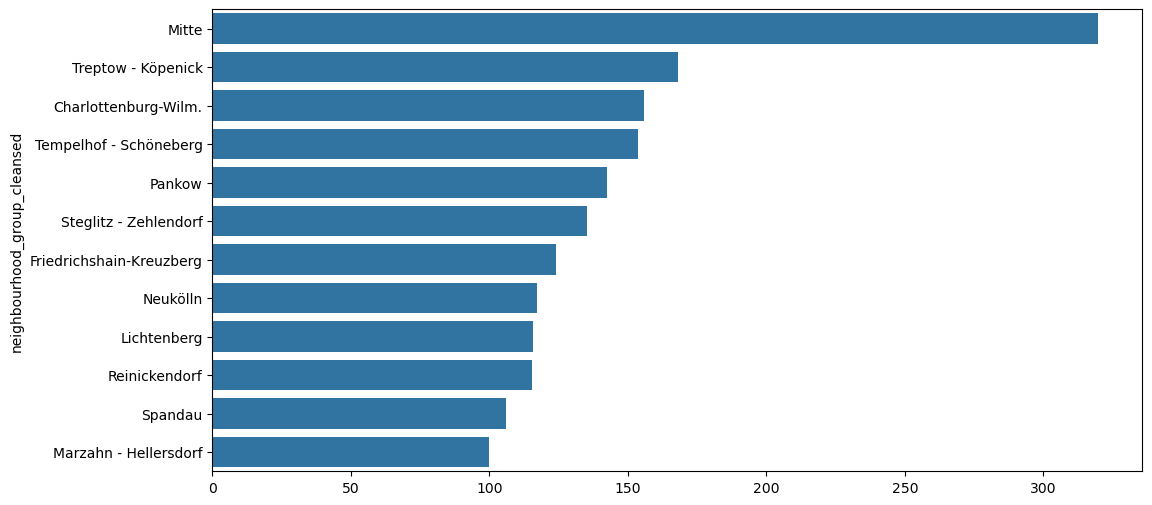

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
sns.barplot(x = avg_neighbourhood_group.values , y = avg_neighbourhood_group.index)
plt.tilte("Average Price by groupped neighbourhood")
plt.show()

In [11]:
# Most Expensive Neighborhoods
avg_neighbor_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False).head(10)
avg_neighbor_price

neighbourhood_cleansed
Müggelheim                                   985.260870
Alexanderplatz                               725.070288
Marienfelde                                  617.315789
Schönholz/Wilhelmsruh/Rosenthal              521.222222
Bohnsdorf                                    444.592593
Schmöckwitz/Karolinenhof/Rauchfangswerder    328.193548
Blankenfelde/Niederschönhausen               300.921569
West 5                                       299.947368
Neue Kantstraße                              288.348148
Rudow                                        270.870370
Name: price, dtype: float64

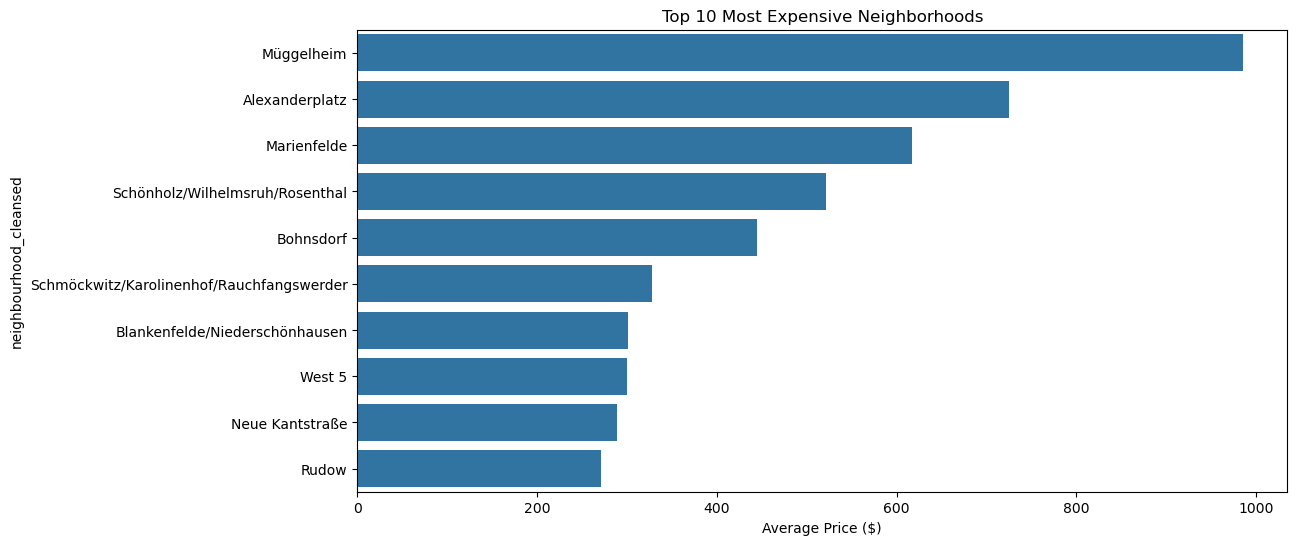

In [14]:
# Most Expensive Neighborhoods Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=avg_neighbor_price.values, y=avg_neighbor_price.index)
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Average Price ($)')
plt.show()


In [15]:
# Inspect the correlation between review rating and price
correlation = df['review_scores_rating'].corr(df['price'])
print(f"correlation Relationship between rating review and price is{correlation:.2f}")

correlation Relationship between rating review and price is-0.00


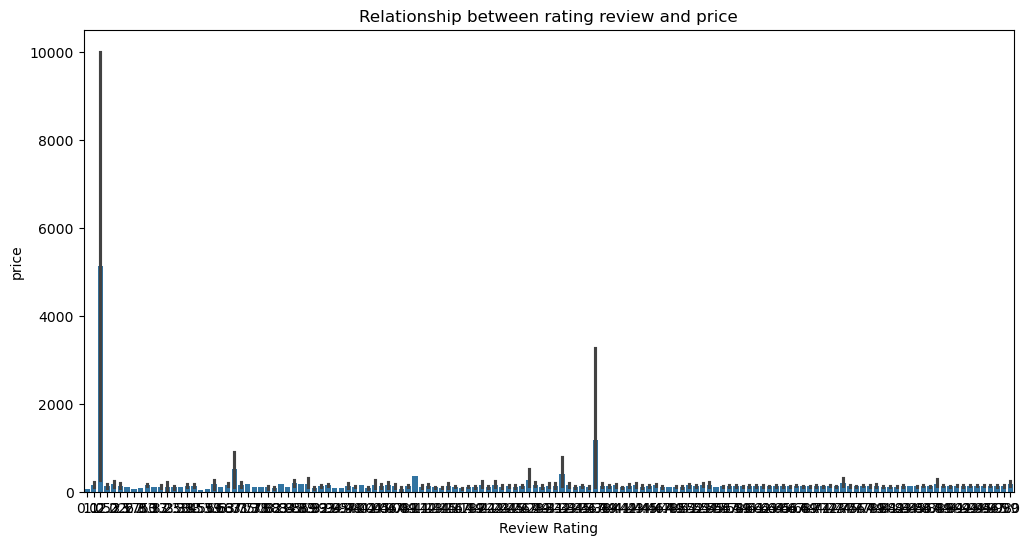

In [52]:

plt.figure(figsize = (12,6))
sns.barplot(x = df['review_scores_rating'], y = df['price'])
plt.title('Relationship between rating review and price')
plt.xlabel('Review Rating')
plt.show()
    

# Room Type Analysis

In [86]:
# Room Distribution
room_count = df['room_type'].value_counts()
room_count

room_type
Entire home/apt    9580
Private room       4397
Hotel room          110
Shared room         100
Name: count, dtype: int64

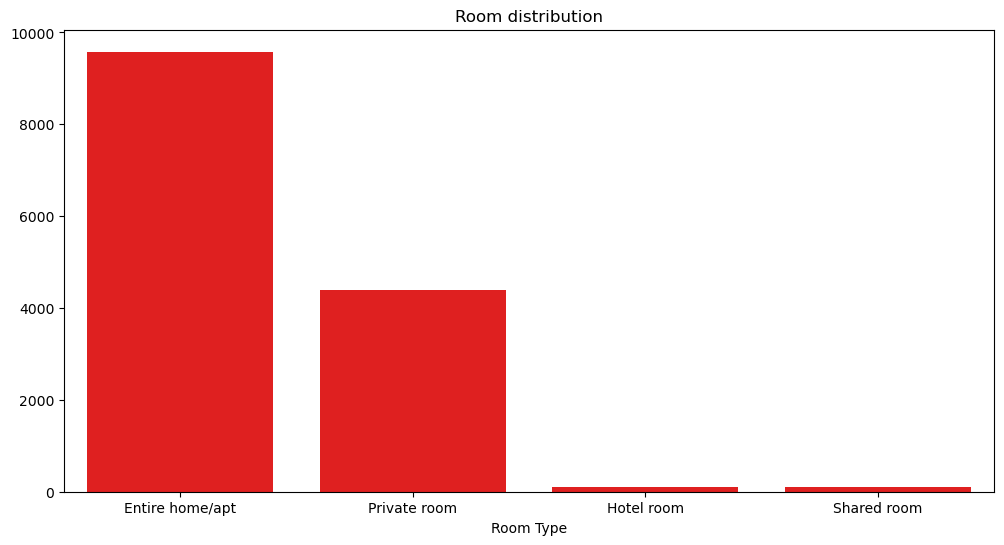

In [85]:
# Room Distribution Visualasion
plt.figure(figsize = (12,6))
sns.barplot(x = room_count.index , y = room_count.values , color = 'red')
plt.title('Room distribution')
plt.xlabel('Room Type')
plt.show()

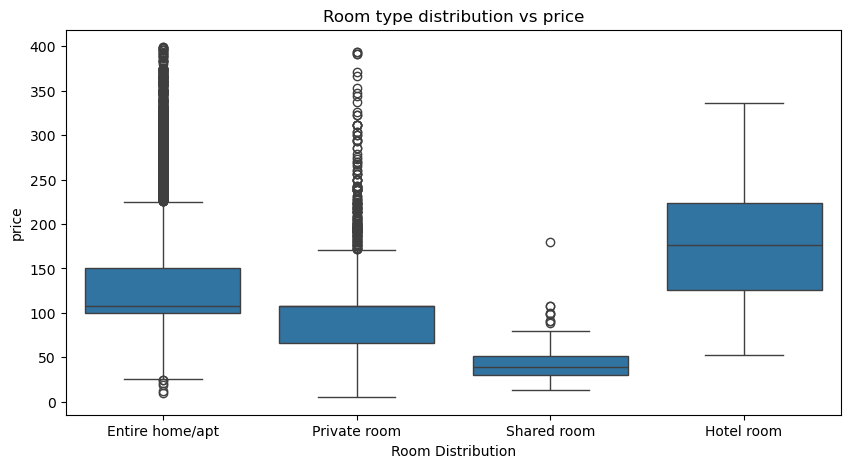

In [98]:
plt.figure(figsize = (10,5))
sns.boxplot(x='room_type', y='price' , data=df[df['price'] < 400])
plt.title( 'Room type distribution vs price')
plt.xlabel('Room Distribution')
plt.show()